In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [2]:
u_cols = ['user_id', 'sex', 'age', 'occupation', 'zip_code']
users = pd.read_csv('users.dat', sep='::', names=u_cols,
                    encoding='latin-1')

r_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('ratings.dat', sep='::', names=r_cols,
                      encoding='latin-1')

# the movies file contains columns indicating the movie's genres
# let's only load the first five columns of the file with usecols
m_cols = ['movie_id', 'title', 'Genre']
movies = pd.read_csv('movies.dat', sep='::', names=m_cols, usecols=range(5),
                     encoding='latin-1')

# create one merged DataFrame
movie_ratings = pd.merge(movies, ratings)
lens = pd.merge(movie_ratings, users)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='pyth

In [3]:
Master_data= pd.DataFrame(lens)

In [4]:
Master_data.head(5)

,movie_id,title,Genre,user_id,rating,timestamp,sex,age,occupation,zip_code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


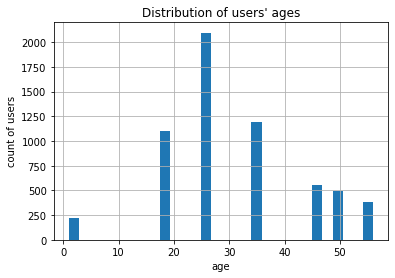

In [5]:
users.age.plot.hist(bins=30)
plt.title("Distribution of users' ages")
plt.ylabel('count of users')
plt.grid()
plt.xlabel('age');

In [6]:
toystory_data = ratings[ratings.movie_id==1]
toystory_data.head()

,user_id,movie_id,rating,timestamp
40,1,1,5,978824268
469,6,1,4,978237008
581,8,1,4,978233496
711,9,1,5,978225952
837,10,1,5,978226474


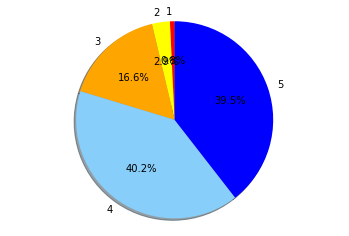

In [7]:
labels = '1', '2', '3', '4','5'
sizes = [16,61, 345, 835,820]
colors = ['red', 'yellow', 'orange', 'lightskyblue','blue']
explode = (0, 0, 0, 0,0)  # explode 1st slice

# Plot
plt.pie(sizes, labels=labels, colors=colors, explode=explode, 
autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.show()

In [8]:
movie_rating = ratings.groupby(['movie_id'], as_index=False)
average_movie_ratings = movie_rating.agg({'rating':'mean'})
top_25_movies = average_movie_ratings.sort_values('rating', ascending=False).head(25)
top_25_movies

,movie_id,rating
779,854,5.000000
900,989,5.000000
778,853,5.000000
3471,3800,5.000000
726,787,5.000000
2201,2444,5.000000
532,557,5.000000
2987,3280,5.000000
1617,1830,5.000000
893,981,5.000000


In [9]:
pd.merge(top_25_movies, movies, how='left', left_on=['movie_id'], right_on=['movie_id'])

,movie_id,rating,title,Genre
0,854,5.000000,"Ballad of Narayama, The (Narayama Bushiko) (1958)",Drama
1,989,5.000000,Schlafes Bruder (Brother of Sleep) (1995),Drama
2,853,5.000000,Dingo (1992),Drama
3,3800,5.000000,Criminal Lovers (Les Amants Criminels) (1999),Drama|Romance
4,787,5.000000,"Gate of Heavenly Peace, The (1995)",Documentary
5,2444,5.000000,24 7: Twenty Four Seven (1997),Comedy|Drama
6,557,5.000000,Mamma Roma (1962),Drama
7,3280,5.000000,"Baby, The (1973)",Horror
8,1830,5.000000,Follow the Bitch (1998),Comedy
9,981,5.000000,Dangerous Ground (1997),Drama


In [10]:
user_rating_data = ratings[ratings['user_id']==2696]
user_rating_data.head()

,user_id,movie_id,rating,timestamp
440667,2696,1258,4,973308710
440668,2696,1270,2,973308676
440669,2696,1617,4,973308842
440670,2696,1625,4,973308842
440671,2696,1644,2,973308920


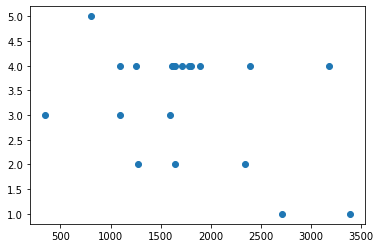

In [11]:
plt.scatter(x=user_rating_data['movie_id'], y=user_rating_data['rating'])
plt.show()

In [14]:
gen_sep=Master_data['Genre']
movie_ID= Master_data["movie_id"]

In [15]:
gen_sep.head()

0             Animation|Children's|Comedy
1    Animation|Children's|Musical|Romance
2                                   Drama
3         Action|Adventure|Fantasy|Sci-Fi
4                               Drama|War
Name: Genre, dtype: object

In [16]:
df=pd.DataFrame()     

In [17]:
df["gen_sepe"]=gen_sep

In [18]:
df["movie_names"]= movie_ID

In [19]:
genre_types=[]
df.head()

,gen_sepe,movie_names
0,Animation|Children's|Comedy,1
1,Animation|Children's|Musical|Romance,48
2,Drama,150
3,Action|Adventure|Fantasy|Sci-Fi,260
4,Drama|War,527


In [20]:
for i in gen_sep:
    temp= i.split('|')
    genre_types.extend(temp)
    

In [21]:
unique=list(set(genre_types))
unique

['Drama',
 'Documentary',
 'Animation',
 'Horror',
 'War',
 'Western',
 'Mystery',
 'Fantasy',
 'Sci-Fi',
 'Thriller',
 'Comedy',
 'Crime',
 'Musical',
 'Romance',
 'Adventure',
 'Action',
 "Children's",
 'Film-Noir']

In [22]:
unique.sort()
unique

['Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [23]:
for i in unique:
    df[i]=df["gen_sepe"].str.contains(i)*1

In [24]:
df.head(5)

,gen_sepe,movie_names,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,Animation|Children's|Comedy,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Animation|Children's|Musical|Romance,48,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,Drama,150,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,Action|Adventure|Fantasy|Sci-Fi,260,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,Drama|War,527,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [25]:
gender=Master_data['sex']
df["gender"]=gender
df.head(5)

,gen_sepe,movie_names,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,gender
0,Animation|Children's|Comedy,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,F
1,Animation|Children's|Musical|Romance,48,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,F
2,Drama,150,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,F
3,Action|Adventure|Fantasy|Sci-Fi,260,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,F
4,Drama|War,527,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,F


In [26]:
gender.describe()

count     514876
unique         2
top            M
freq      391357
Name: sex, dtype: object

In [27]:
uni=list(set(Master_data['sex']))

In [28]:
uni

['M', 'F']

In [29]:
for i in uni:
    df[i]=df["gender"].str.contains(i)*1

In [30]:
df.head(5)

,gen_sepe,movie_names,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,gender,M,F
0,Animation|Children's|Comedy,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,F,0,1
1,Animation|Children's|Musical|Romance,48,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,F,0,1
2,Drama,150,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,F,0,1
3,Action|Adventure|Fantasy|Sci-Fi,260,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,F,0,1
4,Drama|War,527,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,F,0,1


In [31]:
occupation=Master_data['occupation']
age=Master_data['age']
df["Occupation"]= occupation
df["age"]=age

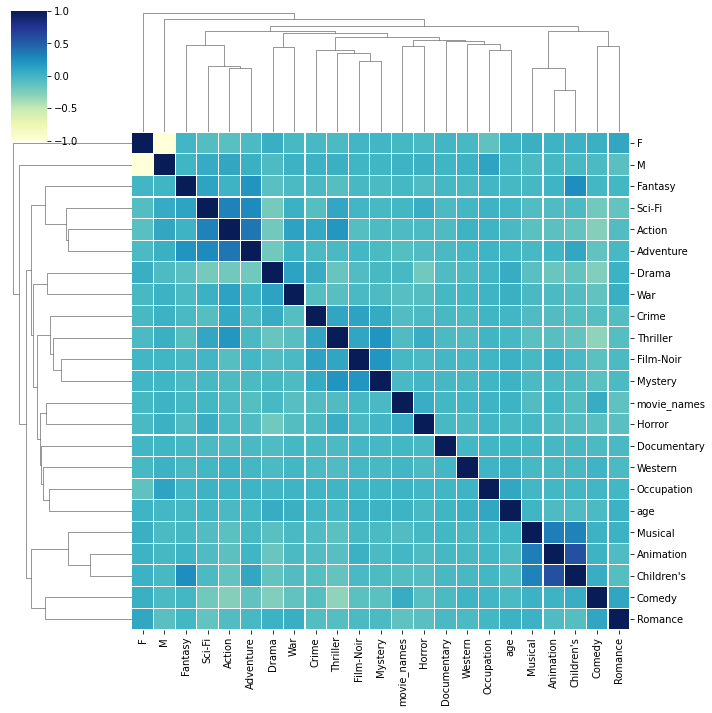

In [32]:
from scipy.stats import norm 
corrmat = df.corr() 
  
cg = sns.clustermap(corrmat, cmap ="YlGnBu", linewidths = 0.1); 
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0) 

cg

In [33]:
viewership = pd.merge(ratings, users, how='left', left_on=['user_id'], right_on=['user_id'])
viewership.head(5)

,user_id,movie_id,rating,timestamp,sex,age,occupation,zip_code
0,1,1193,5,978300760,F,1,10,48067
1,1,661,3,978302109,F,1,10,48067
2,1,914,3,978301968,F,1,10,48067
3,1,3408,4,978300275,F,1,10,48067
4,1,2355,5,978824291,F,1,10,48067


In [34]:
few_viewership = viewership.head(500)

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(few_viewership['age'])
x_age = le.transform(few_viewership['age'])
x_age

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [36]:
le.fit(few_viewership['occupation'])
x_occ = le.transform(few_viewership['occupation'])
x_occ

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,

In [37]:
le.fit(few_viewership['sex'])
x_sex = le.transform(few_viewership['sex'])
x_sex

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [38]:
few_viewership['New Age'] = x_age
few_viewership['New Occupation'] = x_occ
few_viewership['New Sex'] = x_sex

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [39]:
x_input = few_viewership[['New Age','New Occupation','New Sex']]
y_target = few_viewership['rating']

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_input, y_target, test_size=0.25)

In [41]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((375, 3), (125, 3), (375,), (125,))

In [42]:
from sklearn.linear_model import LogisticRegression
logitReg = LogisticRegression()
lm = logitReg.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [43]:
result = logitReg.predict(x_test)

In [44]:
estimated = pd.Series(result, name='Estimated Values')

In [45]:
final_result = pd.concat([y_test, estimated], axis=1)

In [46]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print (accuracy_score(y_test, result))
print (confusion_matrix(y_test, result))
print (classification_report(y_test, result))

0.328
[[ 0  0  0  8  1]
 [ 0  0  2 13  1]
 [ 0  0  6 33  0]
 [ 0  0  9 31  0]
 [ 0  0  8  9  4]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00        16
           3       0.24      0.15      0.19        39
           4       0.33      0.78      0.46        40
           5       0.67      0.19      0.30        21

    accuracy                           0.33       125
   macro avg       0.25      0.22      0.19       125
weighted avg       0.29      0.33      0.26       125



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [48]:
models = []
seed = 7
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the n

LR: 0.362233 (0.076663)
LDA: 0.362304 (0.076089)
KNN: 0.328165 (0.061722)
CART: 0.365149 (0.056879)
NB: 0.192105 (0.049030)
SVM: 0.367923 (0.043403)


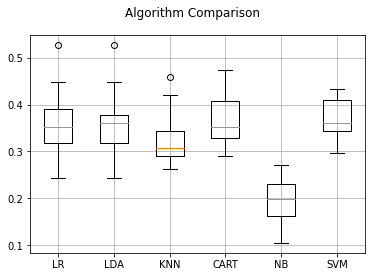

In [49]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.grid(0.025)
plt.show()

In [50]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [51]:
y_pred = svclassifier.predict(x_test)
y_pred

array([4, 4, 4, 4, 3, 3, 4, 3, 3, 4, 4, 4, 3, 3, 4, 4, 4, 3, 4, 3, 4, 4,
       4, 3, 3, 4, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 3, 4,
       4, 4, 4, 4, 4, 3, 3, 4, 3, 3, 4, 4, 4, 4, 4, 3, 3, 3, 4, 4, 4, 3,
       4, 4, 4, 3, 4, 4, 3, 3, 3, 3, 3, 3, 4, 4, 4, 3, 4, 4, 4, 3, 4, 4,
       3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 3, 4, 4, 4, 3, 4, 3,
       3, 4, 4, 4, 3, 4, 3, 4, 4, 3, 4, 4, 4, 3, 4])

In [52]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 0  0  0  9  0]
 [ 0  0  3 13  0]
 [ 0  0 13 26  0]
 [ 0  0 16 24  0]
 [ 0  0 10 11  0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00        16
           3       0.31      0.33      0.32        39
           4       0.29      0.60      0.39        40
           5       0.00      0.00      0.00        21

    accuracy                           0.30       125
   macro avg       0.12      0.19      0.14       125
weighted avg       0.19      0.30      0.23       125



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
X_train = lda.fit_transform(x_train, y_train)
X_test = lda.transform(x_test)

In [54]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [55]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[ 0  0  0  9  0]
 [ 0  0  2 14  0]
 [ 0  0  6 33  0]
 [ 0  0  9 31  0]
 [ 0  0  8 13  0]]
Accuracy0.296
